# Część 2: Uczenie maszynowe - metody nadzorowane

In [ ]:
# 1.
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.7 MB/s eta 0:00:00


In [ ]:
# Odpowiednie importy i załadowanie danych

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
import os

datadir = '/content/drive/MyDrive/Data'
fn = 'spam.dat'

Mounted at /content/drive


In [ ]:
# Data

dataframe = pd.read_csv(os.path.join(datadir, fn))
dataframe.head(5)

dataframe.shape

dataframe.describe()

dataframe['target'].value_counts()

,count
target,
no,2949
yes,1840


In [ ]:
# Standaryzacja danych

from sklearn.model_selection import train_test_split

X = dataframe.drop(['target'],axis=1)
y = dataframe.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=331, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 3208, test rows: 1581


In [ ]:
# Importy do weryfikacji skuteczności modeli

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


# 1. Algorytm klasyfikatora

0.9335863377609108


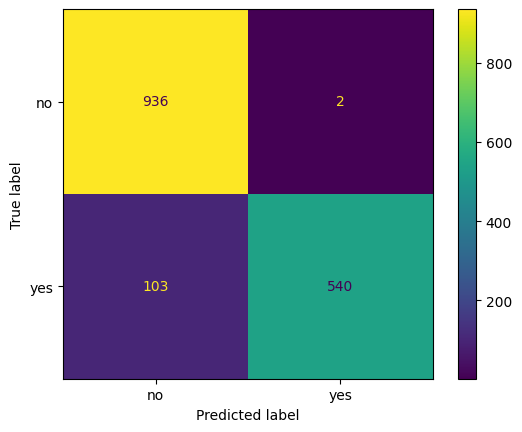

              precision    recall  f1-score   support

          no       0.90      1.00      0.95       938
         yes       1.00      0.84      0.91       643

    accuracy                           0.93      1581
   macro avg       0.95      0.92      0.93      1581
weighted avg       0.94      0.93      0.93      1581



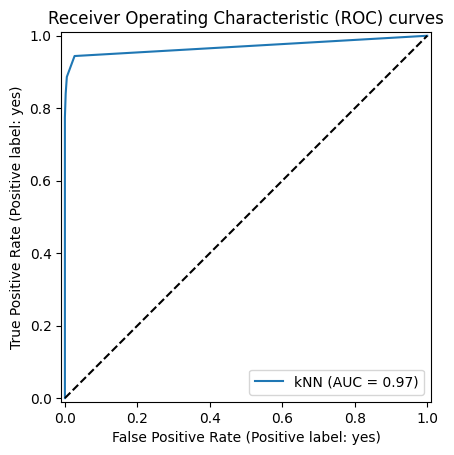

In [ ]:
# algorytm 1 - kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Tworzenie modelu kNN
knn = KNeighborsClassifier(n_neighbors=5)  # Domyślna liczba sąsiadów to 5
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Wyświetlenie dokładności
print(knn.score(X_test, y_test))

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

# Raport klasyfikacji
print(classification_report(y_test, y_pred_knn))

# Krzywa ROC
RocCurveDisplay.from_estimator(knn, X_test, y_test, name='kNN')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.show()


0.9854522454142948


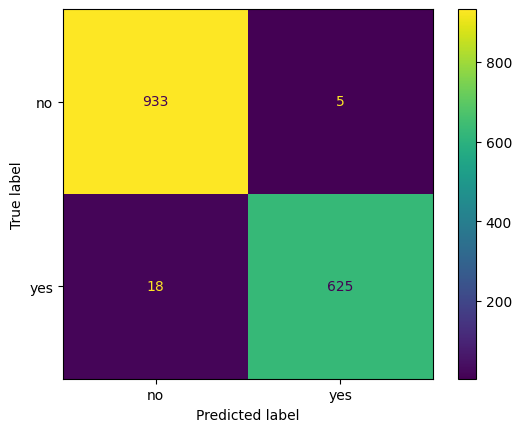

              precision    recall  f1-score   support

          no       0.98      0.99      0.99       938
         yes       0.99      0.97      0.98       643

    accuracy                           0.99      1581
   macro avg       0.99      0.98      0.98      1581
weighted avg       0.99      0.99      0.99      1581



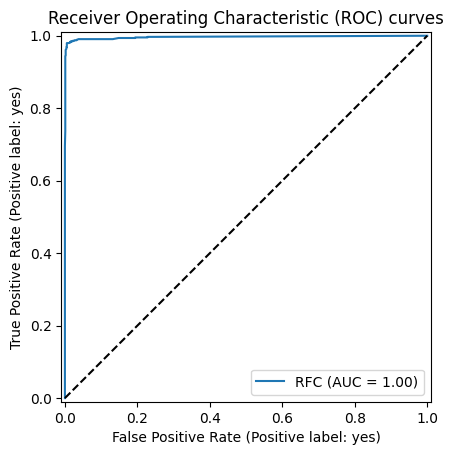

In [ ]:
# algorytm 2 - las losowy + metryki

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(rfc.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_rfc))
RocCurveDisplay.from_estimator(rfc, X_test, y_test, name='RFC')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.show()

Dokładność: 0.9835547122


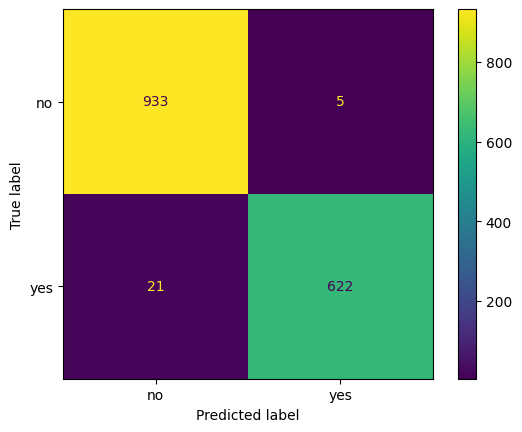

              precision    recall  f1-score   support

          no       0.98      0.99      0.99       938
         yes       0.99      0.97      0.98       643

    accuracy                           0.98      1581
   macro avg       0.99      0.98      0.98      1581
weighted avg       0.98      0.98      0.98      1581



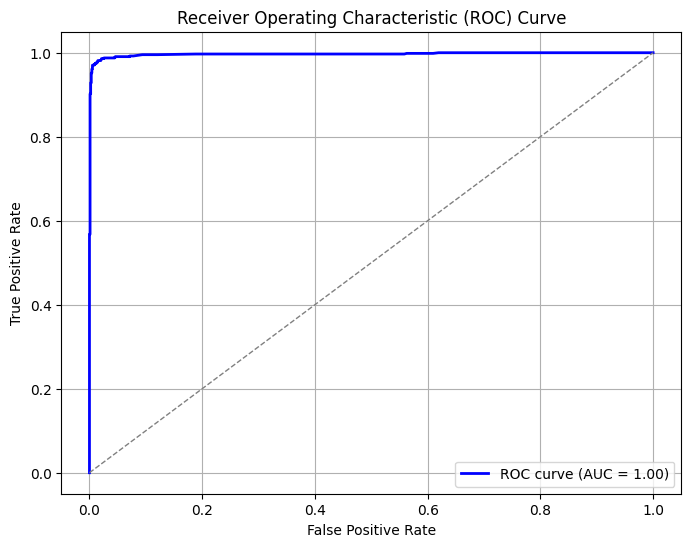

In [ ]:
# algorytm 3 - XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Lokalne kodowanie etykiet
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tworzenie modelu XGBoost (bez `use_label_encoder`)
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train_encoded)
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]  # Prawdopodobieństwa dla klasy pozytywnej

# Wyświetlenie dokładności
print(f"Dokładność: {xgb.score(X_test, y_test_encoded):.10f}")

# Macierz konfuzji
cm = confusion_matrix(y_test_encoded, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

# Raport klasyfikacji
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))

# Obliczanie krzywej ROC i AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba_xgb)
roc_auc = auc(fpr, tpr)

# Wykres krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


0.9728020240354206


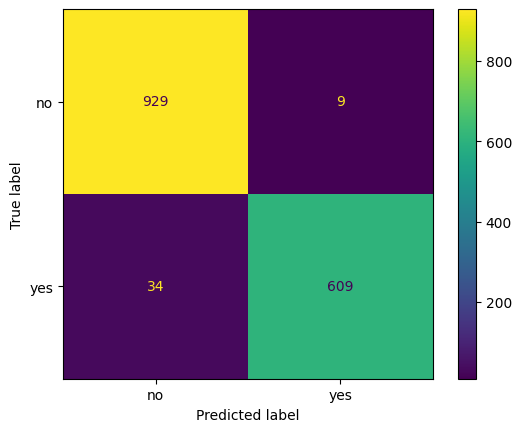

              precision    recall  f1-score   support

          no       0.96      0.99      0.98       938
         yes       0.99      0.95      0.97       643

    accuracy                           0.97      1581
   macro avg       0.98      0.97      0.97      1581
weighted avg       0.97      0.97      0.97      1581



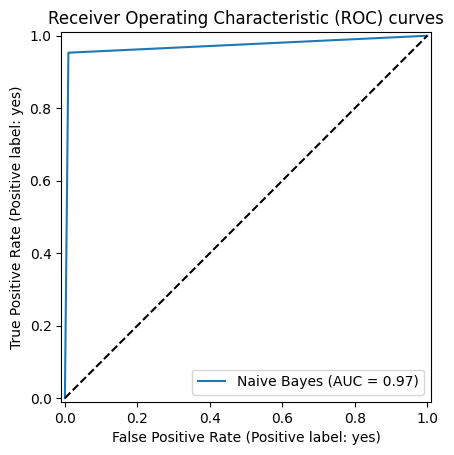

In [ ]:
# algorytm 4 - naiwny bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Tworzenie modelu Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Wyświetlenie dokładności
print(nb.score(X_test, y_test))

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

# Raport klasyfikacji
print(classification_report(y_test, y_pred_nb))

# Krzywa ROC
RocCurveDisplay.from_estimator(nb, X_test, y_test, name='Naive Bayes')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.show()

0.9810246679316889


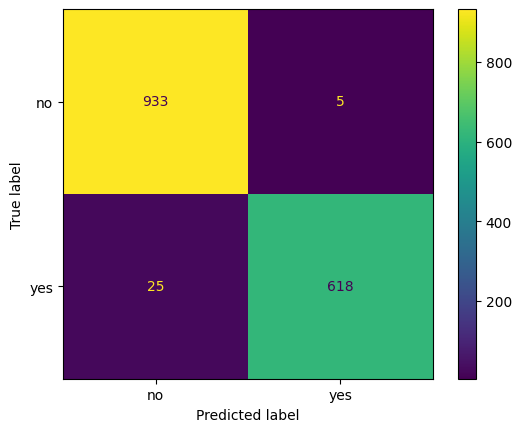

              precision    recall  f1-score   support

          no       0.97      0.99      0.98       938
         yes       0.99      0.96      0.98       643

    accuracy                           0.98      1581
   macro avg       0.98      0.98      0.98      1581
weighted avg       0.98      0.98      0.98      1581



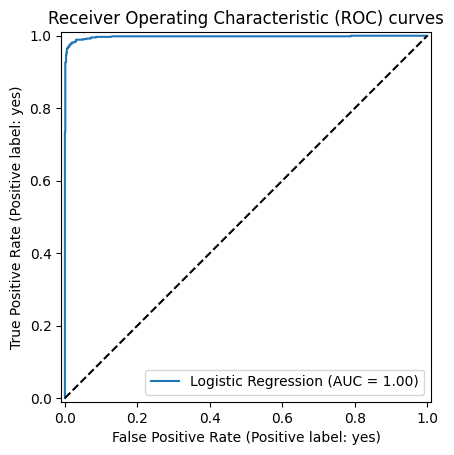

In [ ]:
# algorytm 5 - regresji logistyczna

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Tworzenie modelu regresji logistycznej
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Wyświetlenie dokładności
print(log_reg.score(X_test, y_test))

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

# Raport klasyfikacji
print(classification_report(y_test, y_pred_log_reg))

# Krzywa ROC
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name='Logistic Regression')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.show()

In [ ]:
# Wybrano dwa najbardziej rokujące algorytmy - XGBoost i RFC

# 2. Parametry klasyfikatora

Najlepsze parametry: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 1.0}
Najlepszy wynik na zbiorze testowym: 0.9848197343453511


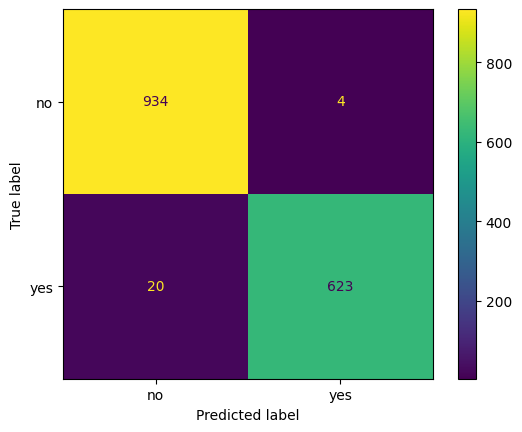

              precision    recall  f1-score   support

          no       0.98      1.00      0.99       938
         yes       0.99      0.97      0.98       643

    accuracy                           0.98      1581
   macro avg       0.99      0.98      0.98      1581
weighted avg       0.98      0.98      0.98      1581



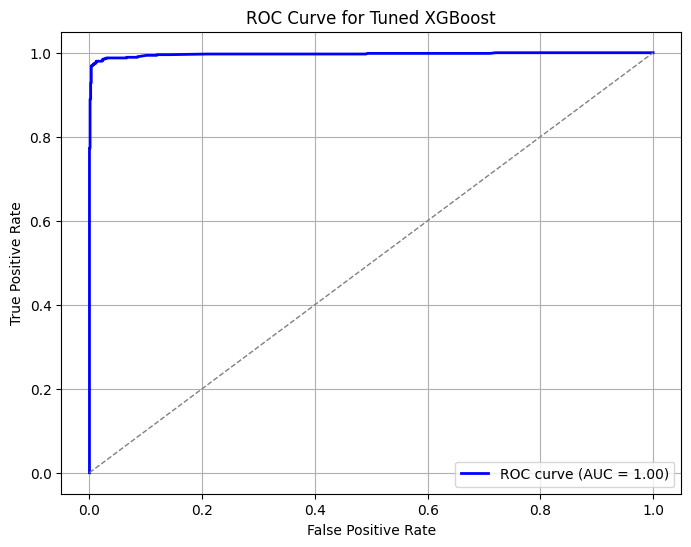

In [ ]:
# 2.1

# Algorytm 1 - XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from itertools import product

# Parametry do testowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Zakodowanie etykiet
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tworzenie listy wszystkich kombinacji parametrów
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['learning_rate'],
    param_grid['subsample'],
    param_grid['colsample_bytree']
))

# Przechowywanie wyników
best_score = 0
best_params = None
best_model = None

# Testowanie wszystkich kombinacji
for n_estimators, max_depth, learning_rate, subsample, colsample_bytree in param_combinations:
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        eval_metric='logloss'
    )
    model.fit(X_train, y_train_encoded)
    score = model.score(X_test, y_test_encoded)

    if score > best_score:
        best_score = score
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree
        }
        best_model = model

# Wyświetlenie najlepszych parametrów i wyniku
print("Najlepsze parametry:", best_params)
print("Najlepszy wynik na zbiorze testowym:", best_score)

# Testowanie najlepszego modelu na danych testowych
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Macierz konfuzji
cm = confusion_matrix(y_test_encoded, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

# Raport klasyfikacji
print(classification_report(y_test_encoded, y_pred_best, target_names=label_encoder.classes_))

# Krzywa ROC i AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

# Wykres ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.title("ROC Curve for Tuned XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total t

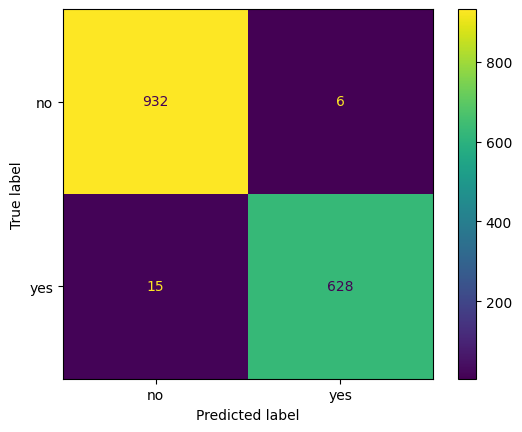

              precision    recall  f1-score   support

          no       0.98      0.99      0.99       938
         yes       0.99      0.98      0.98       643

    accuracy                           0.99      1581
   macro avg       0.99      0.99      0.99      1581
weighted avg       0.99      0.99      0.99      1581



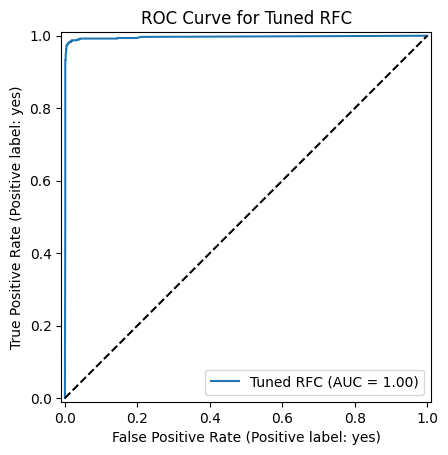

In [ ]:
# 2.2

# Alogrytm 2 - RFC

# Parametry do testowania dla RFC
rfc_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rfc_grid = GridSearchCV(RandomForestClassifier(), rfc_param_grid, scoring='accuracy', cv=3, verbose=2)
rfc_grid.fit(X_train, y_train)

print("Najlepsze parametry dla RFC:", rfc_grid.best_params_)
print("Najlepszy wynik na zbiorze walidacyjnym:", rfc_grid.best_score_)

# Testowanie najlepszego modelu na danych testowych
best_rfc = rfc_grid.best_estimator_
y_pred_best_rfc = best_rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_best_rfc))
RocCurveDisplay.from_estimator(best_rfc, X_test, y_test, name='Tuned RFC')
plt.title("ROC Curve for Tuned RFC")
plt.plot([0, 1], [0, 1], "k--")
plt.legend()
plt.show()



In [ ]:

from joblib import dump

from google.colab import drive

import pandas as pd
import numpy as np
import os

output_dir = '/content/drive/MyDrive/Data'
fn = 'spam.dat'

xgb_model_path = os.path.join(output_dir, 'best_xgb_model.joblib')
dump(best_model, xgb_model_path)
print(f"Model XGBoost zapisany jako: {xgb_model_path}")

rfc_model_path = os.path.join(output_dir, 'best_rfc_model.joblib')
dump(best_rfc, rfc_model_path)
print(f"Model RFC zapisany jako: {rfc_model_path}")

Model XGBoost zapisany jako: /content/drive/MyDrive/Data/best_xgb_model.joblib
Model RFC zapisany jako: /content/drive/MyDrive/Data/best_rfc_model.joblib


Najlepsze parametry dla XGB: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 1.0}

Najlepsze parametry dla RFC: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}




# 3. Wybór zmiennych

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


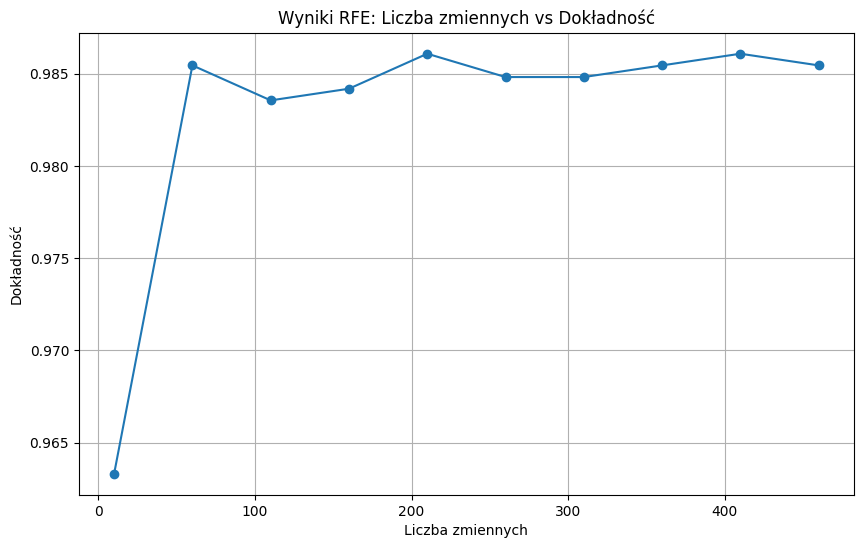

In [ ]:
# 3.1
from google.colab import drive
drive.mount('/content/drive')
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Najlepsze parametry dla RFC
best_rfc_params = {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

# Najlepsze parametry dla XGBoost
best_xgb_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'eval_metric': 'logloss'
}


# Funkcja do treningu modelu i walidacji
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Eksperymenty z RFE
rfe_results = []
rfe_steps = list(range(10, X_train.shape[1] + 1, 50))  # Liczba zmiennych co 50

for n_features in rfe_steps:
    rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=n_features, step=10)
    X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
    X_test_rfe = rfe_selector.transform(X_test)

    # Trening i walidacja
    rfc = RandomForestClassifier(**best_rfc_params)
    accuracy = train_and_evaluate(rfc, X_train_rfe, X_test_rfe, y_train, y_test)
    rfe_results.append((n_features, accuracy))

# Rysowanie wyników RFE
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in rfe_results], [x[1] for x in rfe_results], marker='o')
plt.title("Wyniki RFE: Liczba zmiennych vs Dokładność")
plt.xlabel("Liczba zmiennych")
plt.ylabel("Dokładność")
plt.grid()
plt.show()

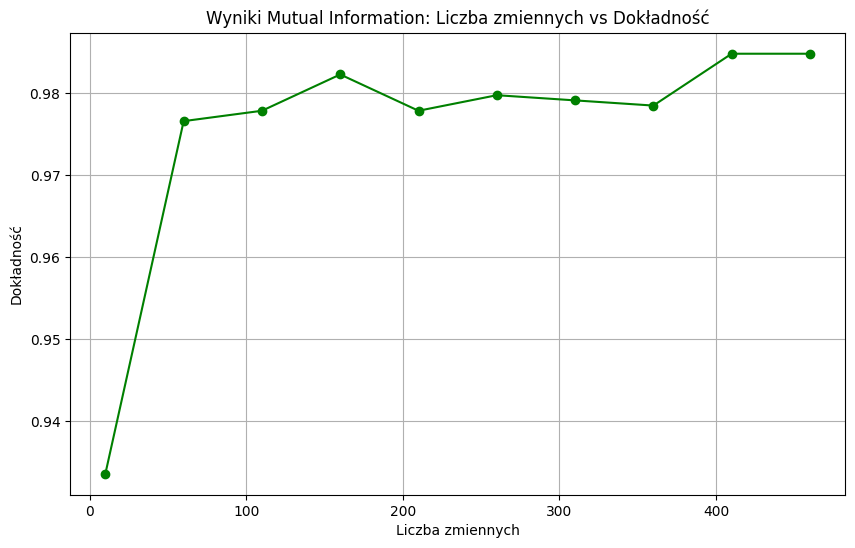

Najlepszy wynik dla Mutual Information: (410, 0.9848197343453511)
Najlepszy wynik dla Mutual Information: [(10, 0.9335863377609108), (60, 0.9765970904490828), (110, 0.9778621125869703), (160, 0.9822896900695762), (210, 0.9778621125869703), (260, 0.9797596457938014), (310, 0.9791271347248577), (360, 0.978494623655914), (410, 0.9848197343453511), (460, 0.9848197343453511)]
Najlepszy wynik dla RFE: (210, 0.9860847564832385)


In [ ]:
# 3.2



# Kodowanie etykiet
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Eksperymenty z Mutual Information
mi_results = []
mi_steps = list(range(10, X_train.shape[1] + 1, 50))  # Liczba zmiennych co 50

for k in mi_steps:
    # Selekcja cech za pomocą mutual information
    mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_mi = mi_selector.fit_transform(X_train, y_train)
    X_test_mi = mi_selector.transform(X_test)

    # Trening i walidacja
    xgb = XGBClassifier(**best_xgb_params)
    accuracy = train_and_evaluate(xgb, X_train_mi, X_test_mi, y_train_encoded, y_test_encoded)
    mi_results.append((k, accuracy))

# Rysowanie wyników Mutual Information
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in mi_results], [x[1] for x in mi_results], marker='o', color='green')
plt.title("Wyniki Mutual Information: Liczba zmiennych vs Dokładność")
plt.xlabel("Liczba zmiennych")
plt.ylabel("Dokładność")
plt.grid()
plt.show()

# Podsumowanie wyników Mutual Information
print("Najlepszy wynik dla Mutual Information:", max(mi_results, key=lambda x: x[1]))
print("Najlepszy wynik dla Mutual Information:", mi_results)

print("Najlepszy wynik dla RFE:", max(rfe_results, key=lambda x: x[1]))


Na podstawie przedstawionych wyników:

Dla metody Mutual Information, najlepszy wynik osiągnięto przy użyciu 410 zmiennych, gdzie dokładność wynosiła 0.9848. Analiza wyników wskazuje, że zwiększenie liczby zmiennych początkowo znacząco poprawia dokładność, ale po pewnym punkcie dodatkowe zmienne przynoszą tylko minimalne korzyści. Znaczące zwiększenie dokładności było możliwe już przy redukcji liczby zmiennych do około 160, co ilustruje efektywność tej metody w zmniejszaniu wymiarowości.

Dla metody RFE, najlepszy wynik uzyskano przy 210 zmiennych, z dokładnością wynoszącą 0.986. Zauważalny jest trend, w którym dokładność początkowo rośnie wraz z liczbą zmiennych, osiągając szczyt, a następnie delikatnie fluktuuje lub spada przy dalszym zwiększaniu liczby zmiennych. Ta metoda pozwoliła na znaczną redukcję wymiarowości przy zachowaniu wysokiej dokładności klasyfikacji.

Macierz konfuzji dla najlepszego RFE (liczba zmiennych: 210)


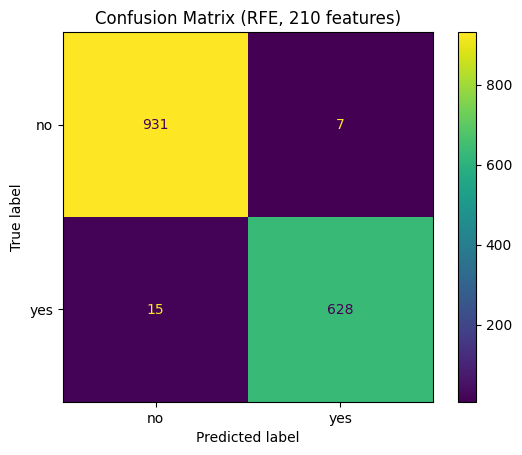

Krzywa ROC dla najlepszego RFE (liczba zmiennych: 210)


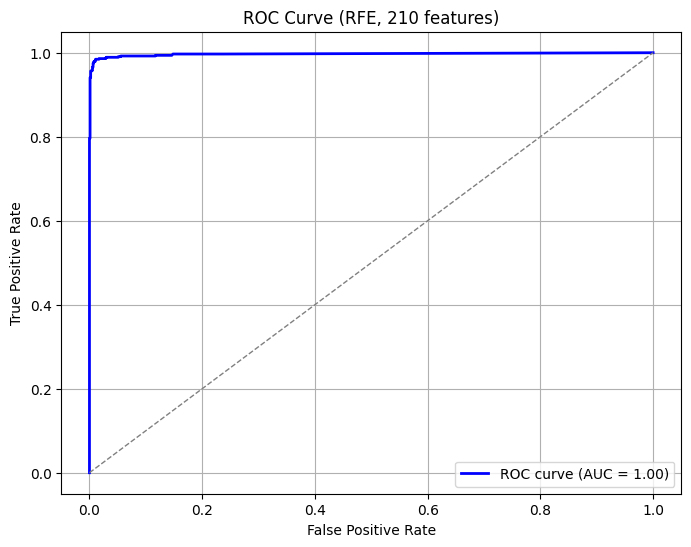

Macierz konfuzji dla najlepszego MI (liczba cech: 410)


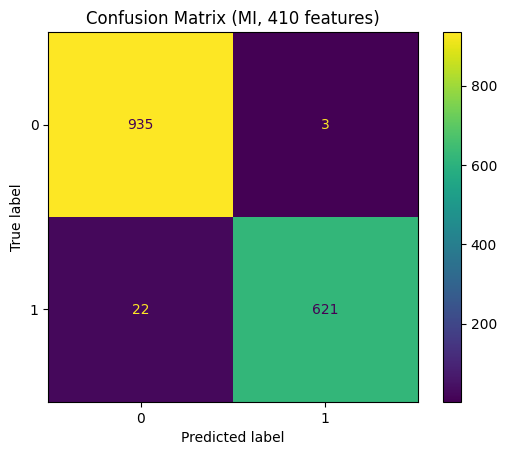

Krzywa ROC dla najlepszego MI (liczba cech: 410)


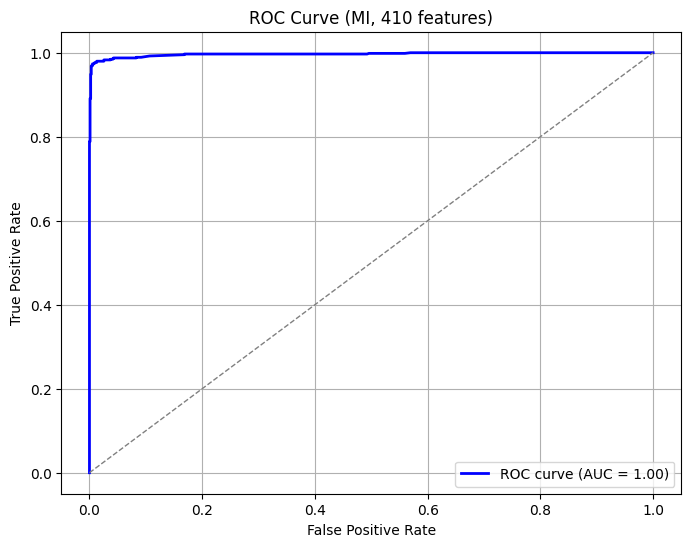

Macierz konfuzji dla MI z 210 cechami


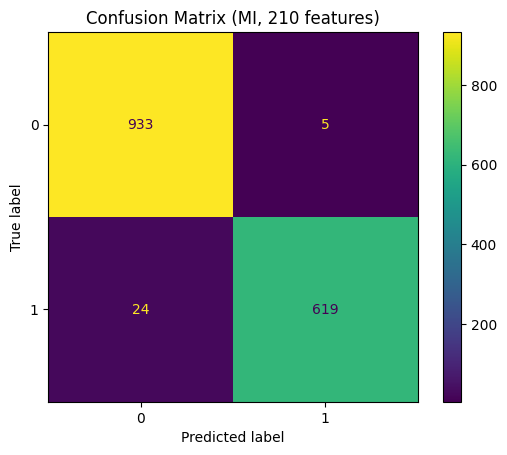

Krzywa ROC dla MI z 210 cechami


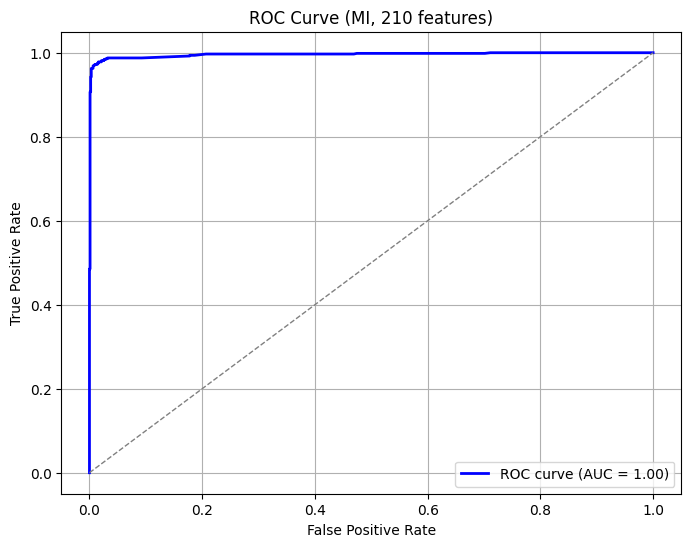

In [ ]:
# 3.3
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Funkcja do rysowania macierzy konfuzji
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model.classes_)
    disp.ax_.set_title(title)
    plt.show()

# Funkcja do rysowania krzywej ROC
def plot_roc_curve(model, X_test, y_test, title):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



# RFE + RFC
best_rfe_features = max(rfe_results, key=lambda x: x[1])[0]
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=best_rfe_features, step=10)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

best_rfc_rfe = RandomForestClassifier(**best_rfc_params)
best_rfc_rfe.fit(X_train_rfe, y_train)

print(f"Macierz konfuzji dla najlepszego RFE (liczba zmiennych: {best_rfe_features})")
plot_confusion_matrix(best_rfc_rfe, X_test_rfe, y_test, f'Confusion Matrix (RFE, {best_rfe_features} features)')

print(f"Krzywa ROC dla najlepszego RFE (liczba zmiennych: {best_rfe_features})")
plot_roc_curve(best_rfc_rfe, X_test_rfe, y_test, f'ROC Curve (RFE, {best_rfe_features} features)')

# Mutual Information + XGBoost
best_mi_features = max(mi_results, key=lambda x: x[1])[0]
mi_selector = SelectKBest(score_func=mutual_info_classif, k=best_mi_features)
X_train_mi = mi_selector.fit_transform(X_train, y_train_encoded)
X_test_mi = mi_selector.transform(X_test)

best_xgb_mi = XGBClassifier(**best_xgb_params)
best_xgb_mi.fit(X_train_mi, y_train_encoded)

print(f"Macierz konfuzji dla najlepszego MI (liczba cech: {best_mi_features})")
plot_confusion_matrix(best_xgb_mi, X_test_mi, y_test_encoded, f'Confusion Matrix (MI, {best_mi_features} features)')

print(f"Krzywa ROC dla najlepszego MI (liczba cech: {best_mi_features})")
plot_roc_curve(best_xgb_mi, X_test_mi, y_test_encoded, f'ROC Curve (MI, {best_mi_features} features)')


# Mutual Information + XGBoost z 210 cechami
best_mi_features = 210
mi_selector = SelectKBest(score_func=mutual_info_classif, k=best_mi_features)
X_train_mi = mi_selector.fit_transform(X_train, y_train_encoded)
X_test_mi = mi_selector.transform(X_test)

best_xgb_mi = XGBClassifier(**best_xgb_params)
best_xgb_mi.fit(X_train_mi, y_train_encoded)

print(f"Macierz konfuzji dla MI z 210 cechami")
plot_confusion_matrix(best_xgb_mi, X_test_mi, y_test_encoded, f'Confusion Matrix (MI, {best_mi_features} features)')

print(f"Krzywa ROC dla MI z 210 cechami")
plot_roc_curve(best_xgb_mi, X_test_mi, y_test_encoded, f'ROC Curve (MI, {best_mi_features} features)')


Najlepszy wynik dla RFE: (210, 0.9860847564832385)
Najlepszy wynik dla MI: (410, 0.9848197343453511)

Najlepszy wynik dla metody RFE został osiągnięty przy 210 cechach, z dokładnością wynoszącą 0.9860. Z kolei dla metody MI najlepszy rezultat osiągnięto przy 410 cechach, gdzie dokładność wyniosła 0.9848, chociaż przy 160 cechach osiągnięto dokładność 0.9823

Mimo tego, że MI najlepiej działa przy większym zestawie cech, to można je skutecznie zredukować przy zachowaniu dobrej dokładności oraz współczynnika FPR w okolicach ~0.53%.

Przy 410 cechach MI osiąga współczynnik FP ~ 0.32%

Dla RFE osiągany jest współczynnik FP w okolicach ~0.75% co wskazuje, że jest pole do poprawy przy dostrojeniu

# 4. Składanie modeli

Trening modelu: RFE + RFC z CatBoost
Macierz konfuzji dla modelu RFE + RFC z CatBoost


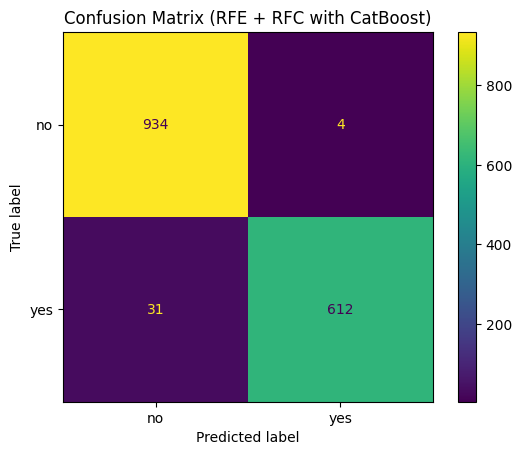

Krzywa ROC dla modelu RFE + RFC z CatBoost


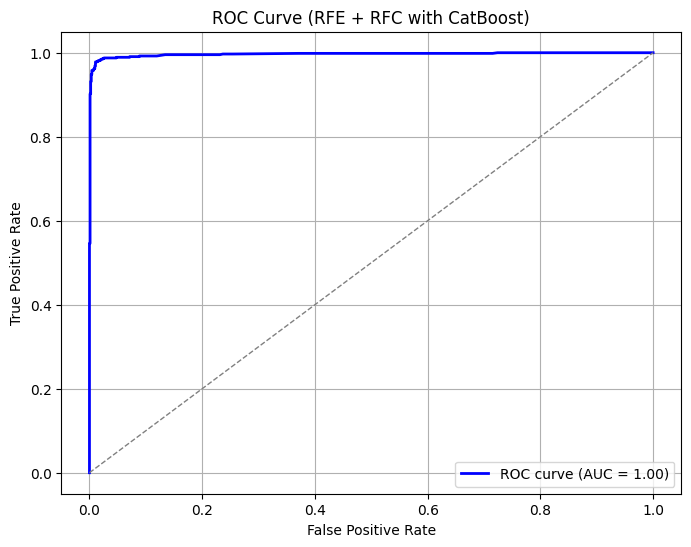

Trening modelu: MI + XGBoost z CatBoost
Macierz konfuzji dla modelu MI + XGBoost z CatBoost


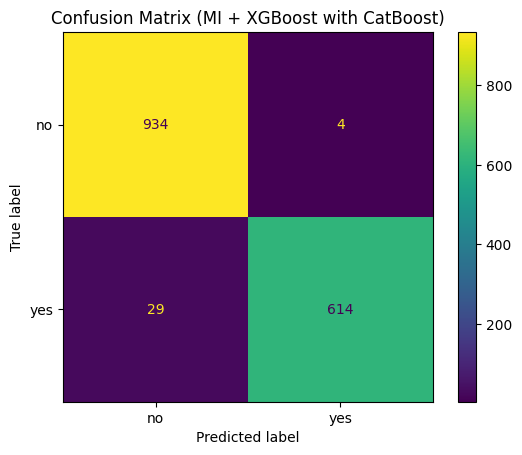

Krzywa ROC dla modelu MI + XGBoost z CatBoost


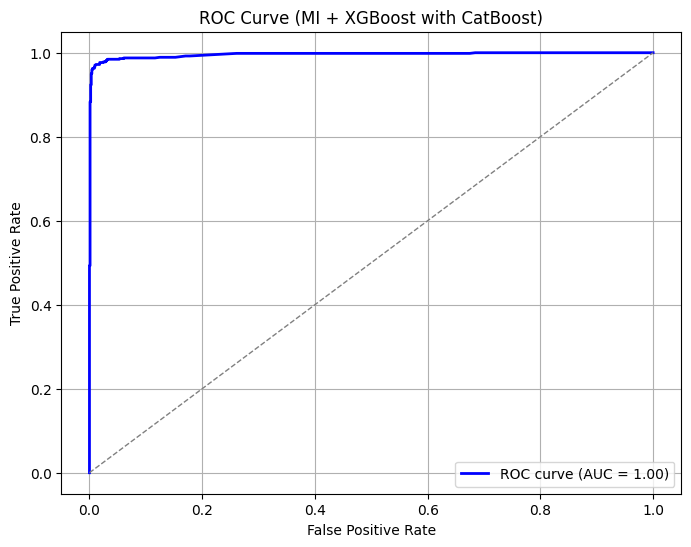

In [ ]:
# 6.
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# 1. Model RFE + RFC z CatBoost
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=210, step=10)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)

# CatBoostClassifier dla RFE
cb_rfc = CatBoostClassifier(iterations=50, random_seed=42, verbose=0)
print("Trening modelu: RFE + RFC z CatBoost")
cb_rfc.fit(X_train_rfe, y_train)

# Walidacja modelu
print("Macierz konfuzji dla modelu RFE + RFC z CatBoost")
plot_confusion_matrix(cb_rfc, X_test_rfe, y_test, "Confusion Matrix (RFE + RFC with CatBoost)")

print("Krzywa ROC dla modelu RFE + RFC z CatBoost")
plot_roc_curve(cb_rfc, X_test_rfe, y_test, "ROC Curve (RFE + RFC with CatBoost)")

# 2. Model MI + XGBoost z CatBoost
# Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=160)
X_train_mi = mi_selector.fit_transform(X_train, y_train)
X_test_mi = mi_selector.transform(X_test)

# CatBoostClassifier dla MI + XGBoost
cb_xgb = CatBoostClassifier(iterations=50, random_seed=42, verbose=0)
print("Trening modelu: MI + XGBoost z CatBoost")
cb_xgb.fit(X_train_mi, y_train)

# Walidacja modelu
print("Macierz konfuzji dla modelu MI + XGBoost z CatBoost")
plot_confusion_matrix(cb_xgb, X_test_mi, y_test, "Confusion Matrix (MI + XGBoost with CatBoost)")

print("Krzywa ROC dla modelu MI + XGBoost z CatBoost")
plot_roc_curve(cb_xgb, X_test_mi, y_test, "ROC Curve (MI + XGBoost with CatBoost)")


RFE + RFC z CatBoost pozwala na osiągnięcie wyniku FPR poniżej 0.5% ≈ 0.42%

Ponieważ XGBoost wraz z MI dla 410 cech osiągnął wynik poniżej 0.5% postanowiłem sprawdzić połączenie XGBoost + MI oraz CatBoost dla 210 cechy, żeby zredukować ich liczbę, udało się osiągnąć ten sam wynik FPR co dla RFC + RFE + CatBoost czyli ~ 0.42%.

Warto zauważyć, że FNR (False Negative Ratio) dla obu metod wzrosło.

# 5. Interpretacja modelu

Istotność cech dla modelu RFE + RFC:
                   Feature  Importance
21         CTYPE_JUST_HTML   25.073736
15             CLICK_BELOW   15.307087
159      SPAM_PHRASE_00_01    8.000780
203               WEB_BUGS    7.442844
118        MISSING_MIMEOLE    4.137093
155              RESENT_TO    3.512711
10         BASE64_ENC_TEXT    3.020973
198        USER_AGENT_PINE    2.846287
157  SIGNATURE_SHORT_DENSE    1.674144
119   MISSING_OUTLOOK_NAME    1.664602


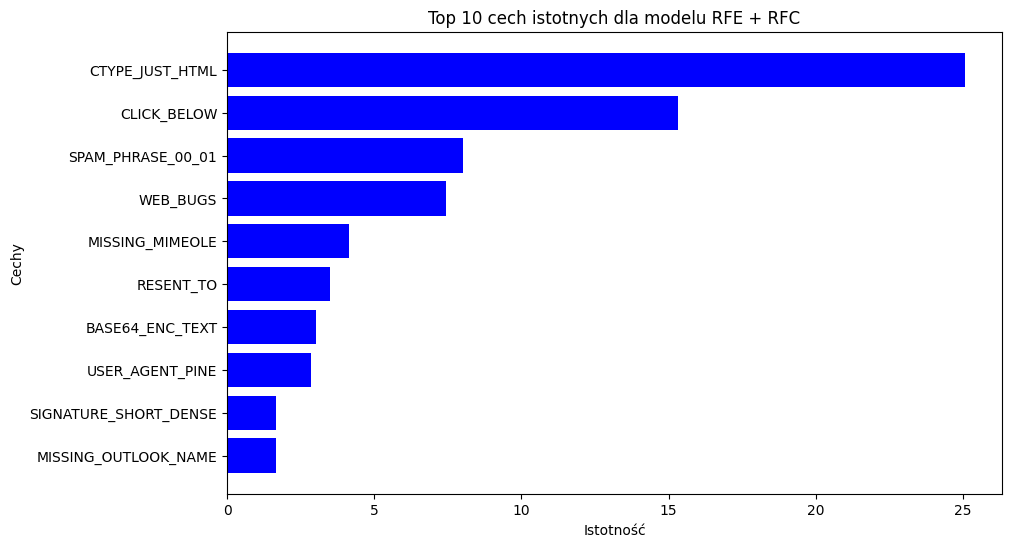

Wizualizacja wpływu cech dla MI + XGBoost (SHAP):


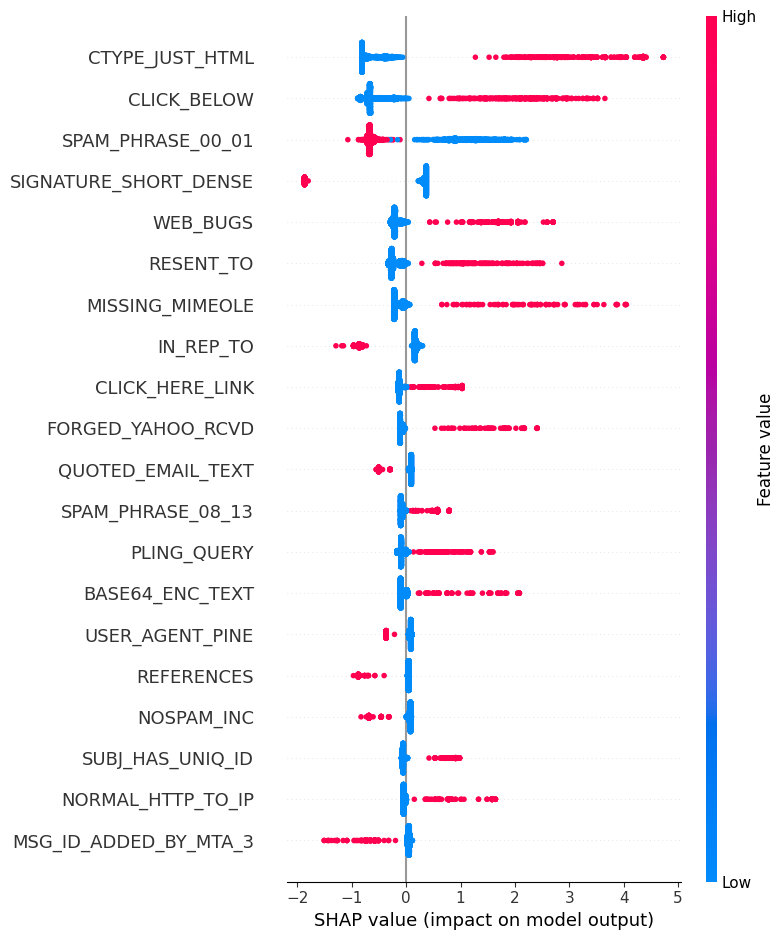

Top 10 cech w modelu RFE + RFC: ['CTYPE_JUST_HTML', 'CLICK_BELOW', 'SPAM_PHRASE_00_01', 'WEB_BUGS', 'MISSING_MIMEOLE', 'RESENT_TO', 'BASE64_ENC_TEXT', 'USER_AGENT_PINE', 'SIGNATURE_SHORT_DENSE', 'MISSING_OUTLOOK_NAME']
Top 10 cech w modelu MI + XGBoost: ['CTYPE_JUST_HTML', 'CLICK_BELOW', 'SIGNATURE_SHORT_DENSE', 'WEB_BUGS', 'MISSING_MIMEOLE', 'SPAM_PHRASE_00_01', 'RESENT_TO', 'BASE64_ENC_TEXT', 'CLICK_HERE_LINK', 'FORGED_YAHOO_RCVD']
- Model RFE + RFC pozwala na interpretację na poziomie oryginalnych zmiennych (feature importance).
- Model MI + XGBoost umożliwia interpretację za pomocą SHAP, co pozwala na wizualizację wpływu cech na predykcje.


In [ ]:
# 7.

import shap
import matplotlib.pyplot as plt
import pandas as pd

# 1. Istotność cech dla modelu RFE + RFC
rfe_feature_importance = pd.DataFrame({
    'Feature': X_train.columns[rfe_selector.support_],  # Wybrane cechy przez RFE
    'Importance': cb_rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Istotność cech dla modelu RFE + RFC:")
print(rfe_feature_importance.head(10))

# Wykres istotności cech
plt.figure(figsize=(10, 6))
plt.barh(rfe_feature_importance['Feature'][:10], rfe_feature_importance['Importance'][:10], color='blue')
plt.gca().invert_yaxis()
plt.title("Top 10 cech istotnych dla modelu RFE + RFC")
plt.xlabel("Istotność")
plt.ylabel("Cechy")
plt.show()

# 2. Istotność cech dla modelu MI + XGBoost (z SHAP)
mi_feature_names = X_train.columns[mi_selector.get_support()]  # Wybrane cechy przez MI
explainer = shap.Explainer(cb_xgb, X_train_mi)
shap_values = explainer(X_test_mi)

# Wykres SHAP dla modelu MI + XGBoost
print("Wizualizacja wpływu cech dla MI + XGBoost (SHAP):")
shap.summary_plot(shap_values, X_test_mi, feature_names=mi_feature_names)

# 3. Porównanie cech
# Wyciągamy najbardziej istotne cechy z modeli i porównujemy
rfe_top_features = rfe_feature_importance['Feature'][:10].tolist()
mi_top_features = pd.DataFrame({
    'Feature': mi_feature_names,
    'Importance': cb_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)['Feature'][:10].tolist()

print("Top 10 cech w modelu RFE + RFC:", rfe_top_features)
print("Top 10 cech w modelu MI + XGBoost:", mi_top_features)

print("- Model RFE + RFC pozwala na interpretację na poziomie oryginalnych zmiennych (feature importance).")
print("- Model MI + XGBoost umożliwia interpretację za pomocą SHAP, co pozwala na wizualizację wpływu cech na predykcje.")


Na podstawie wykresów przedstawiających wpływ cech dla modeli RFE + RFC oraz PCA + MLP można wyciągnąć następujące wnioski:

Model RFE + RFC
Najważniejszą cechą w modelu RFE + RFC jest CTYPE_JUST_HTML, która wskazuje, że wiadomości w formacie HTML mają największy wpływ na klasyfikację jako spam. Drugą istotną cechą jest CLICK_BELOW, co sugeruje, że obecność fraz nakłaniających do działania, takich jak „kliknij poniżej”, jest kluczowym wskaźnikiem spamu. SPAM_PHRASE_00_01, WEB_BUGS, oraz MISSING_MIMEOLE również znacząco wpływają na klasyfikację, ale ich wpływ jest mniejszy.

Ogólnie, cechy wybrane przez RFE odzwierciedlają oryginalne zmienne, co pozwala na intuicyjną interpretację. Model ten jest bardziej konserwatywny w swojej klasyfikacji, co oznacza, że bardzo rzadko klasyfikuje wiadomości jako spam, jeśli nimi nie są (niski poziom false positives). Jednak czasem przeoczy wiadomości, które są spamem (wyższy poziom false negatives).

Model MI + XGBoost

Model MI + XGBoost również wskazuje na dużą istotność cechy CTYPE_JUST_HTML, ale na drugim miejscu plasuje się cecha CLICK_BELOW, podobnie jak w modelu RFE + RFC. SIGNATURE_SHORT_DENSE, WEB_BUGS, oraz MISSING_MIMEOLE są kolejnymi istotnymi cechami. Ciekawą różnicą jest pojawienie się cechy CLICK_HERE_LINK, która wskazuje, że obecność fraz zachęcających do klikania odgrywa większą rolę w modelu MI + XGBoost. FORGED_YAHOO_RCVD również pojawia się jako ważna cecha, co może oznaczać, że model ten bardziej bierze pod uwagę strukturalne aspekty wiadomości.

MI + XGBoost wykorzystuje cechy wybrane na podstawie ich wzajemnej informacji z klasą docelową. Ten model jest bardziej czuły, co oznacza, że rzadziej przepuszcza wiadomości spamowe jako nie-spam (niższy poziom false negatives). Jednak czasem klasyfikuje wiadomości nie-spamowe jako spam (wyższy poziom false positives)..

Model XGBoost + MI bez CatBoost cechuje się najniższą liczbą False-Posivite - 935 na 938 zostało poprawnie sklasyfikowanych jako wiadomości nie będące spamem, natomiast 22 wiadomości zostało uznane jako nie-spam w rzeczywistości będąc spamem. RFE + RFC bez CatBoost poradził sobie lepiej pod kątem False-Negative oraz True-Positives, jedynie 15 wiadomości zostało "pominiętych", łącznie oznaczając 628 wiadomości jako spam

Wybór docelowego modelu powinien być podyktowany celem, czy chcemy "poświęcić" prawidłowe wiadomości na rzecz ochrony przed spamem, czy może jesteśmy w stanie zaakceptować większą liczbę spamu, ale nie tracić cennych wiadomości.

W pierwszej sytuacji lepszym rozwiązaniem byłoby skorzystanie z modelu MI + XGBoost, a w drugiej RFE + RFC

Podsumowując, wybór modelu powinien być uzależniony od konkretnego kontekstu i priorytetów organizacji. W środowiskach korporacyjnych, gdzie ochrona przed spamem i zagrożeniami ma kluczowe znaczenie, MI + XGBoost byłby bardziej odpowiedni. Natomiast w środowiskach, gdzie fałszywe alarmy mogą powodować większe niezadowolenie użytkowników np. usługi konsumenckie, lepiej sprawdziłby się model RFE + RFC.